# Energy Efficiency Building Dataset

### Source:
The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

---

### Dataset Summary:
- **Purpose**: The dataset is designed to perform energy analysis by predicting two continuous variables: heating load and cooling load for various building shapes.
- **Data Source**: 
  - Created by Angeliki Xifara (Civil/Structural Engineer)
  - Processed by Athanasios Tsanas (Oxford Centre for Industrial and Applied Mathematics, University of Oxford)
- **Simulations**: The dataset was generated by simulating 12 different building shapes using Ecotect software, where parameters like glazing area, glazing area distribution, and orientation were varied. These simulations resulted in 768 different building configurations.

---

### Key Data Points:
- **Total Samples**: 768 building configurations (or samples).
- **Features (Inputs)**: 8 attributes related to the building's physical characteristics, denoted as X1 through X8.
- **Targets (Outputs)**: 2 responses related to energy consumption: heating load (`y1`) and cooling load (`y2`).
- **Multi-Class Classification Potential**: If the two response variables (heating load and cooling load) are rounded to the nearest integer, the dataset can be used for multi-class classification instead of regression.

---

### Feature Breakdown:

1. **X1 - Relative Compactness**:
   - This refers to how compact the building is. Higher compactness usually implies lower surface area for a given volume, which affects energy efficiency.
   
2. **X2 - Surface Area**:
   - The total surface area of the building. Larger surface areas may lead to higher heat loss or gain, affecting heating and cooling loads.
   
3. **X3 - Wall Area**:
   - The area covered by walls in the building. Wall materials and surface area are crucial in energy transmission (heat transfer through walls).
   
4. **X4 - Roof Area**:
   - The area of the roof, which impacts energy loads because roofs are significant sites for heat gain/loss, especially based on their exposure to sunlight.
   
5. **X5 - Overall Height**:
   - The height of the building. Taller buildings may have different heat distribution patterns due to air circulation and different exposure to the elements.
   
6. **X6 - Orientation**:
   - Refers to the direction the building faces (e.g., north, south, east, west). Orientation influences solar exposure, which can significantly affect heating and cooling requirements.
   
7. **X7 - Glazing Area**:
   - The area covered by windows or other transparent surfaces. Windows can let in light and heat, influencing the cooling load due to solar gain.
   
8. **X8 - Glazing Area Distribution**:
   - Describes how the glazing (windows) is distributed around the building. Different distributions affect heat gain/loss depending on exposure to sunlight.

---

### Target Variables (Outputs):
1. **y1 - Heating Load**:
   - The amount of energy required to maintain a comfortable indoor temperature by heating the building during cooler weather conditions.
   
2. **y2 - Cooling Load**:
   - The amount of energy required to cool the building during warm weather conditions, keeping the indoor environment within a comfortable temperature range.

---

### Use Cases:
- **Regression Problem**: The dataset is typically used to build regression models that predict heating and cooling loads based on the building's design and orientation features.
- **Multi-Output Regression**: As there are two output variables (`y1` and `y2`), the dataset can also be used for multi-output regression tasks, where both targets are predicted simultaneously.
- **Multi-Class Classification**: If the heating and cooling loads are rounded to the nearest integer, this dataset can be reformulated into a multi-class classification problem, where the goal is to predict which class (integer) the building’s heating or cooling load falls into.

---

### Potential Applications:
- **Energy-Efficient Building Design**: This dataset can be used to design buildings that minimize energy consumption for heating and cooling, by optimizing the features (e.g., glazing area, orientation) to achieve the best energy performance.
- **Environmental Impact Analysis**: By predicting energy loads, the dataset can help assess the environmental impact of building designs and guide the development of more sustainable architectural solutions.

---

### Relevant Papers:
There may be academic papers that have used this dataset to build models for energy-efficient buildings, design simulations, or demonstrate machine learning applications in civil engineering and energy consumption modeling.


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
#import missingno as mso
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor


In [13]:
df=pd.read_csv("ENB2012_data.csv")

In [14]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [15]:
# We have to rename the columns as labeld in the datset : 
df.rename(columns={'X1':'Relative_Compactness','X2':'Surface_Area',
                   'X3':'Wall_Area','X4':'Roof_Area','X5':'Overall_Height',
                   'X6':'Orientation','X7':'Glazing_Area',
                   'X8':'Glazing_Area_Distribution','Y1':'Heating_Load',
                   'Y2':'Cooling_Load'}, inplace=True)
df.head()    



,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [17]:
df["Glazing_Area_Distribution"].value_counts()

# this column look like nominal values ::


1    144
2    144
3    144
4    144
5    144
0     48
Name: Glazing_Area_Distribution, dtype: int64

In [18]:
df["Relative_Compactness"].value_counts()


0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Relative_Compactness, dtype: int64

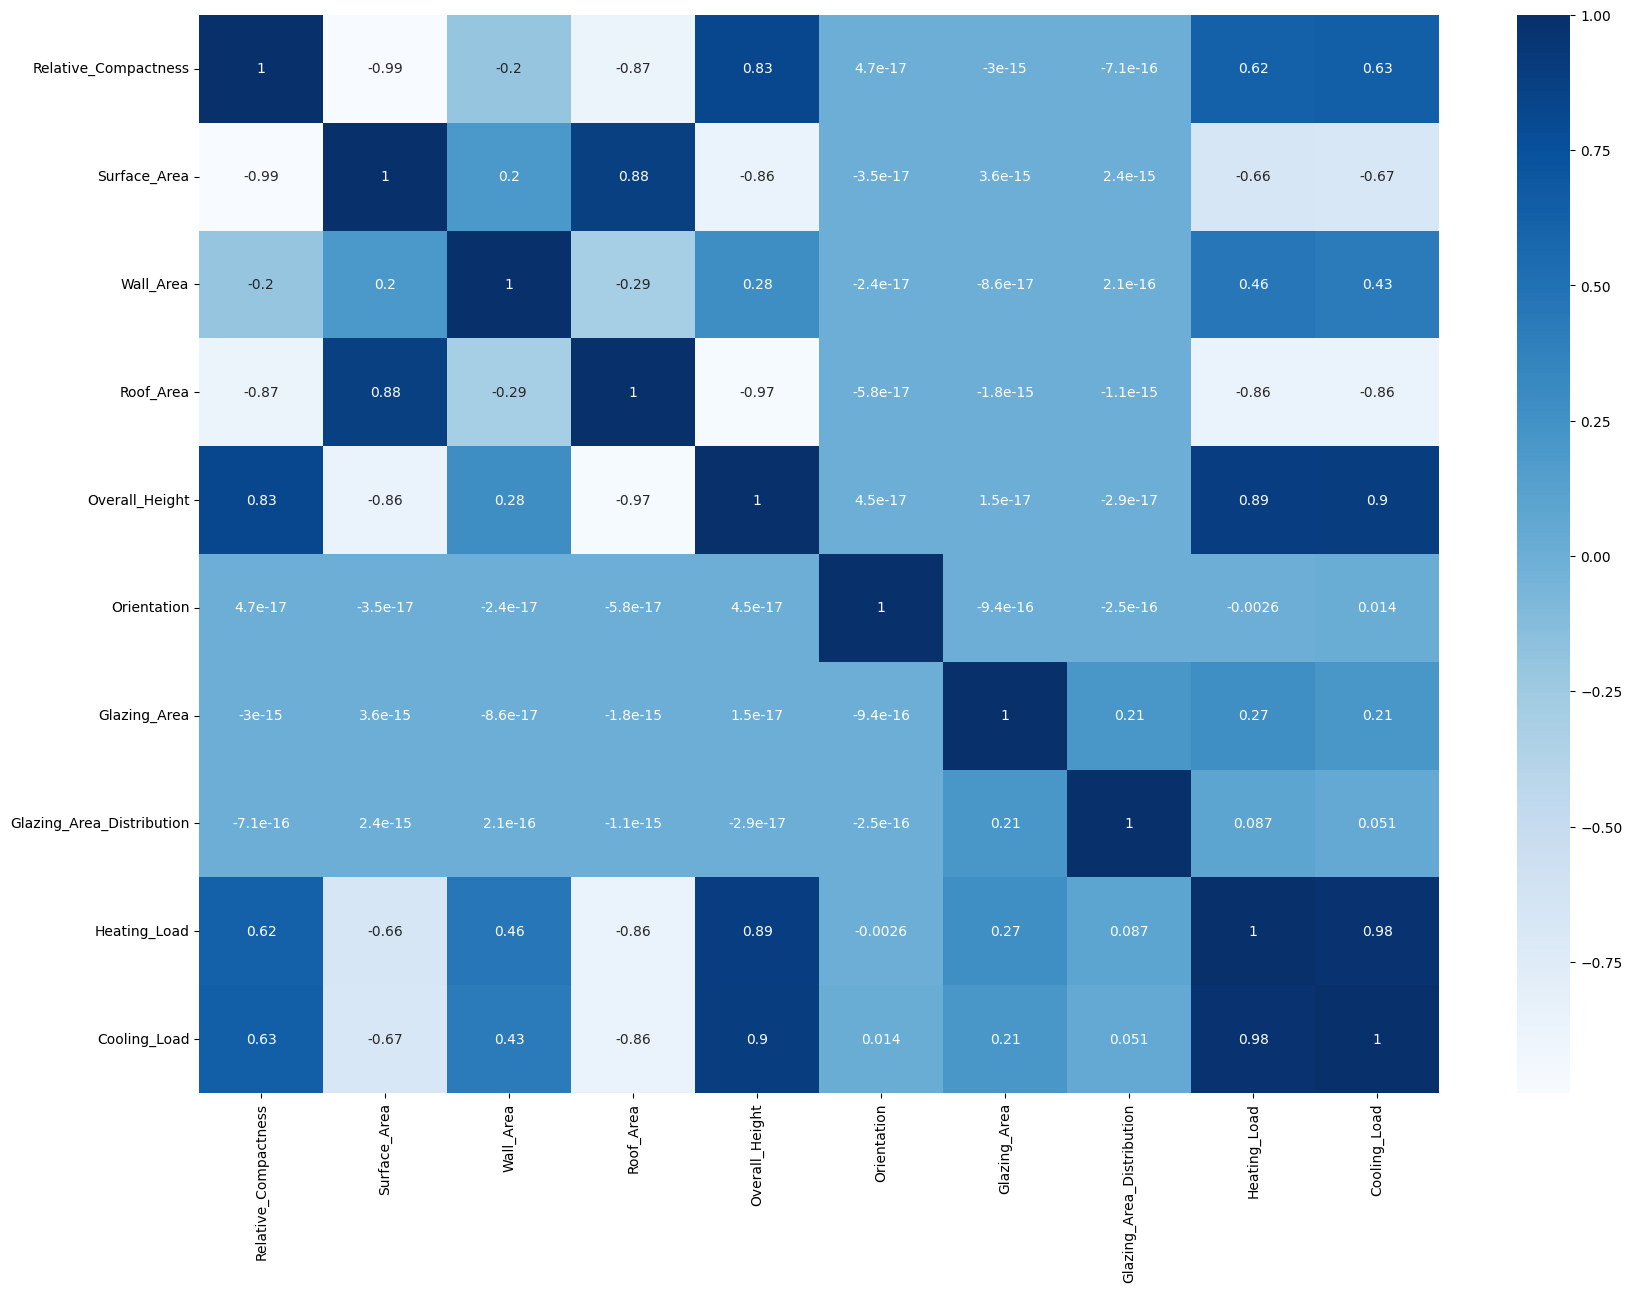

In [19]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap='Blues') # Changed color to cmap
plt.show()

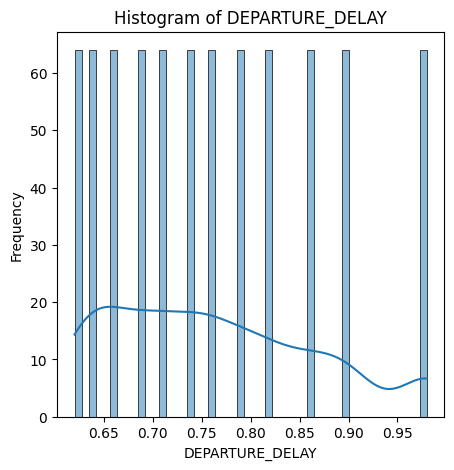

In [20]:
plt.figure(figsize=(5, 5))
sns.histplot(df['Relative_Compactness'], bins=50, kde=True)
plt.title('Histogram of DEPARTURE_DELAY')
plt.xlabel('DEPARTURE_DELAY')
plt.ylabel('Frequency')
plt.show()


<Axes: >

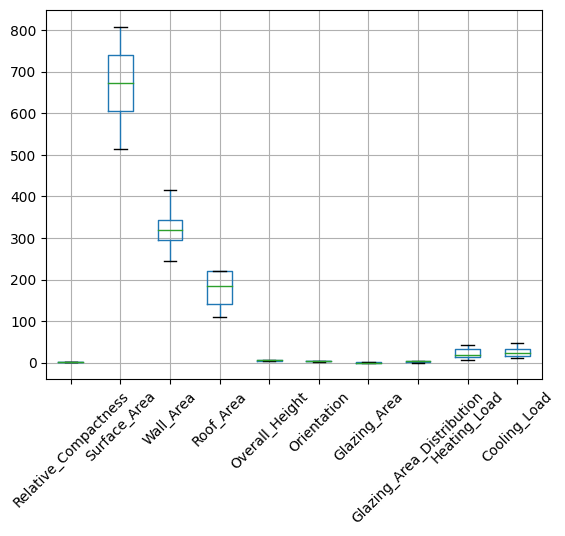

In [21]:
df.boxplot(rot = 45)
# Scaling adopting <<<<< 

In [22]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [29]:
x=df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution']].values



In [30]:
y=df[['Heating_Load', 'Cooling_Load']].values

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the base model for each output
base_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Wrap the base model using MultiOutputRegressor to handle multiple outputs
multi_output_model = MultiOutputRegressor(base_model)

# Fit the model on the training data
multi_output_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_model.predict(X_test)

# Calculate the mean squared error for each output
accuracy = r2_score(y_test, y_pred, multioutput='raw_values')

print(accuracy)

[0.99768897 0.96833387]
